In [1]:
#Se importan las bibliotecas.
from math import cos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
import seaborn as sns

In [2]:
#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})

In [3]:
#Se define la ecuación diferencial junto con sus parámetros.
def fun(t, z, m):
    
        # x''(t) + δx'(t) + αx + βx^3 = γCos(ωt)
        # dx/dt = y
        #Reordenando la primera ecuación en base al cambio de variable y despejando dy/dt
        # dy/dt = - δy - αx - βx^3 + γ*Cos(ωt)
        
    """"
        dx/dt = y
        dy/dt = - δ*y - α*x - β*x**3 + γ*cos(ω*t)
    """

    δ, α, β, γ, ω = m                             #Parámetros de la integral
    x, y = z                                      #Parámetros de integración
    fun = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]  #Función a integrar

    return fun

In [4]:
#Se crea un solucionador de la ecuación diferencial usando el método "runge_kutta_dopri5"
sol = ode(fun)
sol.set_integrator('dopri5')

In [24]:
#Se comienza el proceso para conseguir los puntos para las gráficas.
ai = []
bi = []
aj = []
bj = []

#Se dan los valores de β que pide la actividad.
βh = [-0.003, 0.0000000001, 0.01, 0.04]

#Se hace un for para que saque los puntos de cada curva dada cada valor de 
for h in range (0, len(βh)):
    
    #Arreglos para cada valor de w y x de ida y de vuelta.
    b1 = [] 
    b2 = []  
    a1 = []
    a2 = []

    #Se establece el número de puntos.
    pts = 100
        
    #Se dan valores a los parámetros según la actividad indica.
    γ = 1.0
    α = 1.0
    β = βh[h]
    δ = 0.1
    ω0 = np.linspace(0, 2.5, pts)
        
    t0 = 0.0
    z0 = [1.0, 0.0] 
    z = 0
    for i in range(0,pts):
     
        ω = ω0[i]
        val = δ, α, β, γ, ω
        #Se asignan los parámetros a la solución.
        sol.set_f_params(val)
      
        #Se fijan los valores iniciales.
        sol.set_initial_value(z0, t0)
    
        #Se crean arreglos de valores de tiempo t y arreglos que almacenen los valores
        
        t1 = 20
        n = 400
        t = np.linspace(t0, t1, n)
        solv = np.empty((n, 2))
        solv[0] = z0
    
        #Se llama al integrador para que solucione usando tiempo "k"
        k = 1
    
        while sol.successful() and sol.t < t1:
            sol.integrate(t[k])
            solv[k] = sol.y
            k += 1
        
        x1 = solv[:,0]
        y1 = solv[:,1]
                
        #Se actualizan las condiciones iniciales.
        t0 = 0.0
        z0 = [max(x1),0]
        b1.append(ω)
        a1.append(z0[0])
     

    
    
    t0 = 0.0
    z0 = [1.0,0.0]

    for j in range(0,pts):
    
        if ω0[-j]==0.0:
            ω = 2.5
            val = δ, α, β, γ, ω                      
            sol.set_f_params(val)
        else:
            ω = ω0[-j]
            val = δ, α, β, γ, ω                      
            sol.set_f_params(val)
    
        #Por histeresa, las condiciones iniciales son las últimas de cuando iba de ida.
        sol.set_initial_value(z0, t0)
    
        #Se crea un arreglo de tiempos para evaluar la solución.
        #Además, también se hace un arreglo que almacene los valores obtenidos.
        t1 = 20
        n = 400
        t = np.linspace(t0, t1, n)
        solv = np.empty((n, 2))
        solv[0] = z0
    
        #Lo mismo que de ida.
        k = 1
    
        while sol.successful() and sol.t < t1:
            sol.integrate(t[k])
            solv[k] = sol.y
            k += 1
        
        x2 = solv[:,0]
        y2 = solv[:,1]
    
        #Se actualizan las condiciones iniciales.
        t0 = 0.0
        z0 = [max(x2),0]
        b2.append(ω)
        a2.append(z0[0])
        
    #Se guardan todos los arreglos
    ai.append(a1)
    bi.append(b1)
    aj.append(a2)
    bj.append(b2)

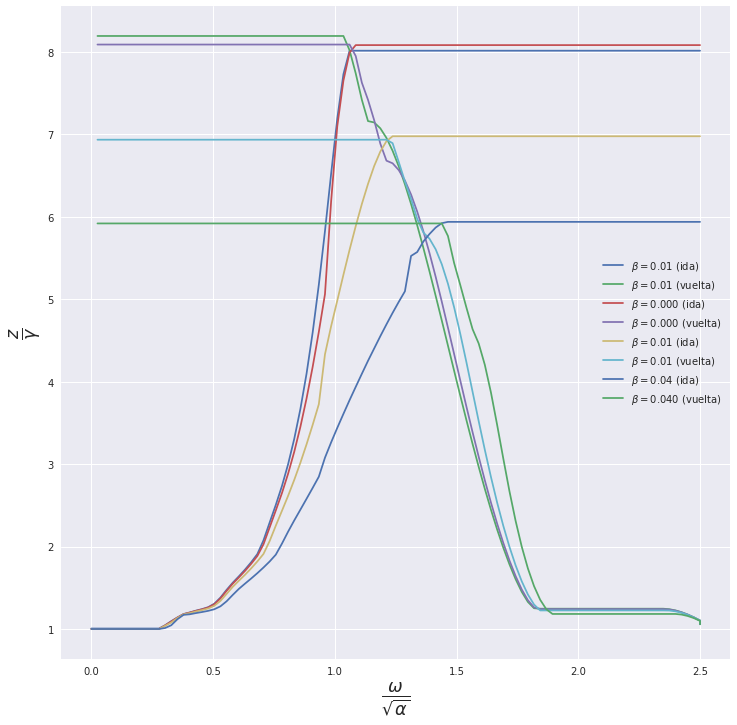

In [25]:
#Se grafican los puntos.
plt.plot(bi[0], ai[0], label = r'$\beta = 0.01$ (ida)')
plt.plot(bj[0], aj[0], label = r'$\beta = 0.01$ (vuelta)')
plt.plot(bi[1], ai[1], label = r'$\beta = 0.000$ (ida)')
plt.plot(bj[1], aj[1], label = r'$\beta = 0.000$ (vuelta)')
plt.plot(bi[2], ai[2], label = r'$\beta = 0.01$ (ida)')
plt.plot(bj[2], aj[2], label = r'$\beta = 0.01$ (vuelta)')
plt.plot(bi[3], ai[3], label = r'$\beta = 0.04$ (ida)')
plt.plot(bj[3], aj[3], label = r'$\beta = 0.04$0 (vuelta)')

plt.legend()
plt.grid()
plt.xlabel(r'$\frac{\omega}{\sqrt{\alpha}}$', fontsize = 25)
plt.ylabel(r'$\frac{z}{\gamma}$', fontsize = 25)
plt.grid(True)
plt.show()